## Aprendizado Supervisionado

Prática com KNN e wine

In [1]:
# pacotes básicos
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pacotes do sklearn para acesso a datasets, preparação, modelagem e avaliação
from sklearn import datasets
# pacote pipeline para combinar preparação e modelagem
from sklearn.pipeline import Pipeline, make_pipeline
# arsenal de preparação
from sklearn.preprocessing import MinMaxScaler # rescala em min-max
from sklearn.preprocessing import StandardScaler # padroniza features removendo média e 
#     escalando para variância unitária. Também chamado de z-score
#
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as CMD
#
#    opções de seleção de modelo de entrada
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.utils import resample

#pacotes para apoio a leitura e gravação de datasets
from pathlib import Path
import csv
import pprint

In [2]:
# carga de dados 
wine = datasets.load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
X = wine.data
y = wine.target

In [4]:
wine.frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
# separação em treino e teste, e X e y

treino_X, teste_X, treino_y, teste_y = tts(X, y, random_state=0, test_size=0.2, stratify=y)

print(treino_X.shape)
print(treino_y.shape)
print(teste_X.shape)
print(teste_y.shape)
print(np.stack(np.unique(teste_y, return_counts=True), axis=1))

(142, 13)
(142,)
(36, 13)
(36,)
[[ 0 12]
 [ 1 14]
 [ 2 10]]


##  Experimento sem reescala de valores

k= 1   Acuracia= 0.6388888888888888
k= 3   Acuracia= 0.5555555555555556
k= 5   Acuracia= 0.6111111111111112
k= 7   Acuracia= 0.5833333333333334
k= 9   Acuracia= 0.6111111111111112
k= 11   Acuracia= 0.6111111111111112
k= 13   Acuracia= 0.5833333333333334


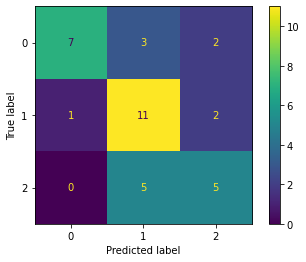

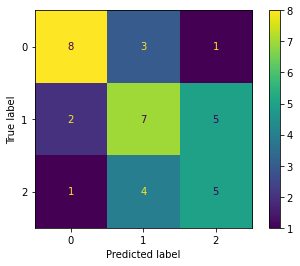

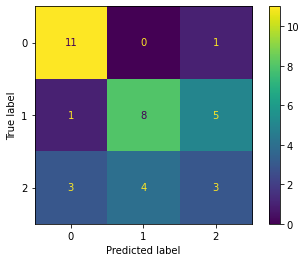

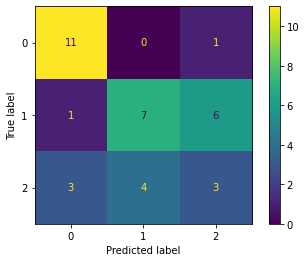

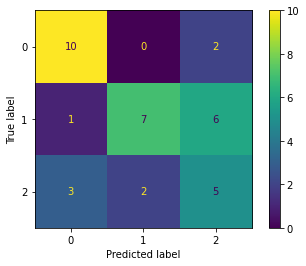

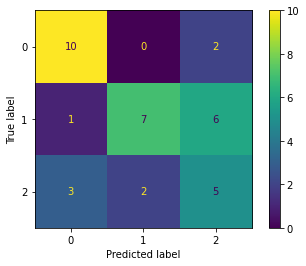

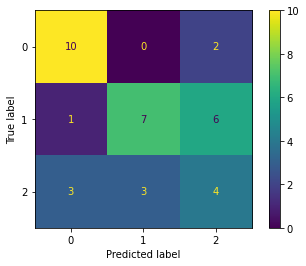

In [6]:
# indução do modelo para diferentes números de vizinhos

n_vizinhos = [1, 3, 5, 7, 9, 11, 13]

for n in n_vizinhos:
    modelo = knn(n_neighbors=n)
    modelo.fit(treino_X, treino_y)
    teste_pred_y = modelo.predict(teste_X)
    acuracia = acc_score(teste_y, teste_pred_y)
    resultado = cm(teste_y, teste_pred_y)
    cm_display = CMD(resultado).plot()
    print('k=', n,'  Acuracia=', acuracia)
    


##  Experimento com reescala de valores

k= 1   Acuracia= 1.0
k= 3   Acuracia= 1.0
k= 5   Acuracia= 0.9722222222222222
k= 7   Acuracia= 0.9722222222222222
k= 9   Acuracia= 0.9722222222222222
k= 11   Acuracia= 0.9722222222222222
k= 13   Acuracia= 0.9722222222222222


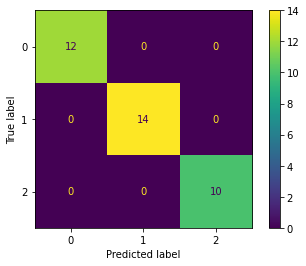

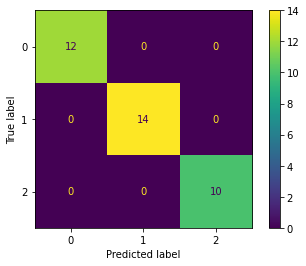

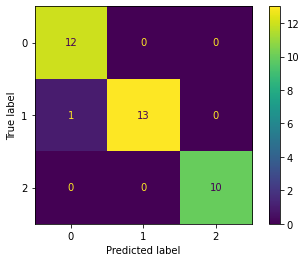

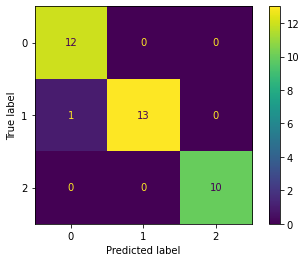

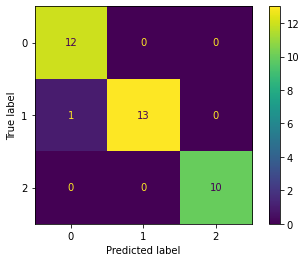

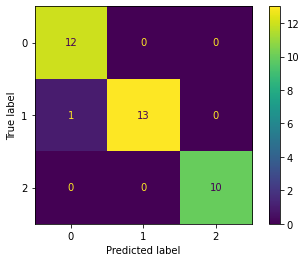

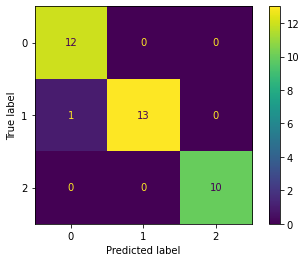

In [7]:
# protocolo experimental

n_vizinhos = [1, 3, 5, 7, 9, 11, 13]

for n in n_vizinhos:
  escalonador = MinMaxScaler()
  estimador = knn(n_neighbors= n)
  treino_X_escalonado = escalonador.fit_transform(treino_X, treino_y)
  estimador.fit(treino_X_escalonado, treino_y)
  teste_X_escalonado = escalonador.transform(teste_X)
  teste_pred_y = estimador.predict(teste_X_escalonado)
  acuracia = acc_score(teste_y, teste_pred_y)
  resultado = cm(teste_y, teste_pred_y)
  cm_display = CMD(resultado).plot()
  print('k=', n,'  Acuracia=', acuracia)

##   Experimento sem reescala mas com validação cruzada

Fold= 0 ----------------
k= 1   Acuracia= 0.8333333333333334
k= 3   Acuracia= 0.6666666666666666
k= 5   Acuracia= 0.6666666666666666
k= 7   Acuracia= 0.6666666666666666
k= 9   Acuracia= 0.7222222222222222
k= 11   Acuracia= 0.7777777777777778
k= 13   Acuracia= 0.7777777777777778
Fold= 1 ----------------
k= 1   Acuracia= 0.7777777777777778
k= 3   Acuracia= 0.6111111111111112
k= 5   Acuracia= 0.6666666666666666
k= 7   Acuracia= 0.7222222222222222
k= 9   Acuracia= 0.7222222222222222
k= 11   Acuracia= 0.7222222222222222
k= 13   Acuracia= 0.7222222222222222
Fold= 2 ----------------
k= 1   Acuracia= 0.6666666666666666
k= 3   Acuracia= 0.6666666666666666
k= 5   Acuracia= 0.6111111111111112
k= 7   Acuracia= 0.6111111111111112
k= 9   Acuracia= 0.6666666666666666
k= 11   Acuracia= 0.6111111111111112
k= 13   Acuracia= 0.6111111111111112
Fold= 3 ----------------
k= 1   Acuracia= 0.5555555555555556
k= 3   Acuracia= 0.6666666666666666
k= 5   Acuracia= 0.6111111111111112
k= 7   Acuracia= 0.5
k= 9   Ac

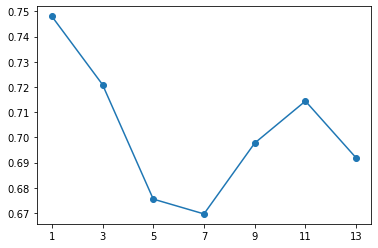

In [8]:
#  criação das amostras para as execuções

n_splits = 10

n_vizinhos = [1, 3, 5, 7, 9, 11, 13]

dskf = skf(n_splits=n_splits)

vetor_acuracia = np.zeros((n_splits, (np.max(n_vizinhos)-1)//2+1))

for i, (treino_index, teste_index) in enumerate(dskf.split(X, y)):

  print('Fold=', i,'----------------')


  treino_X, teste_X = X.iloc[treino_index], X.iloc[teste_index]
  treino_y, teste_y = y.iloc[treino_index], y.iloc[teste_index]
    
# indução do modelo para diferentes números de vizinhos


  for n in n_vizinhos:
      modelo = knn(n_neighbors=n)
      modelo.fit(treino_X, treino_y)
      teste_pred_y = modelo.predict(teste_X)
      acuracia = acc_score(teste_y, teste_pred_y)
      vetor_acuracia[i - 1, (n - 1)//2] = acuracia
      resultado = cm(teste_y, teste_pred_y)
      #cm_display = CMD(resultado).plot()
      #plt.show()
      print('k=', n,'  Acuracia=', acuracia)
      
        
avg_acuracia = vetor_acuracia.mean(axis=0)

plt.plot(n_vizinhos, avg_acuracia, '-o')
plt.xticks(n_vizinhos);

##  Experimento com reescala e com validação cruzada

Fold= 0 ----------------
k= 1   Acuracia= 0.8333333333333334
k= 3   Acuracia= 0.8333333333333334
k= 5   Acuracia= 0.9444444444444444
k= 7   Acuracia= 1.0
k= 9   Acuracia= 1.0
k= 11   Acuracia= 1.0
k= 13   Acuracia= 0.9444444444444444
Fold= 1 ----------------
k= 1   Acuracia= 0.9444444444444444
k= 3   Acuracia= 0.9444444444444444
k= 5   Acuracia= 0.8888888888888888
k= 7   Acuracia= 0.8888888888888888
k= 9   Acuracia= 0.9444444444444444
k= 11   Acuracia= 0.9444444444444444
k= 13   Acuracia= 0.9444444444444444
Fold= 2 ----------------
k= 1   Acuracia= 0.9444444444444444
k= 3   Acuracia= 0.9444444444444444
k= 5   Acuracia= 0.9444444444444444
k= 7   Acuracia= 0.9444444444444444
k= 9   Acuracia= 0.9444444444444444
k= 11   Acuracia= 0.9444444444444444
k= 13   Acuracia= 0.9444444444444444
Fold= 3 ----------------
k= 1   Acuracia= 0.9444444444444444
k= 3   Acuracia= 0.9444444444444444
k= 5   Acuracia= 0.9444444444444444
k= 7   Acuracia= 0.9444444444444444
k= 9   Acuracia= 0.9444444444444444
k= 

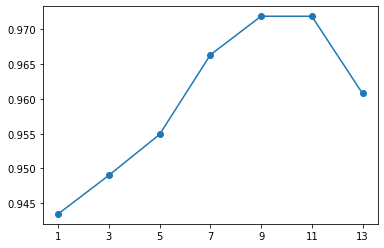

In [9]:
#  criação das amostras para as execuções

n_splits = 10

n_vizinhos = [1, 3, 5, 7, 9, 11, 13]

dskf = skf(n_splits=n_splits)

vetor_acuracia = np.zeros((n_splits, (np.max(n_vizinhos)-1)//2+1))

for i, (treino_index, teste_index) in enumerate(dskf.split(X, y)):

  print('Fold=', i,'----------------')


  treino_X, teste_X = X.iloc[treino_index], X.iloc[teste_index]
  treino_y, teste_y = y.iloc[treino_index], y.iloc[teste_index]
    
# indução do modelo para diferentes números de vizinhos


  for n in n_vizinhos:
    escalonador = MinMaxScaler()
    estimador = knn(n_neighbors= n)
    treino_X_escalonado = escalonador.fit_transform(treino_X, treino_y)
    estimador.fit(treino_X_escalonado, treino_y)
    teste_X_escalonado = escalonador.transform(teste_X)
    teste_pred_y = estimador.predict(teste_X_escalonado)
    acuracia = acc_score(teste_y, teste_pred_y)
    vetor_acuracia[i - 1, (n - 1)//2] = acuracia
    #resultado = cm(teste_y, teste_pred_y)
    #cm_display = CMD(resultado).plot()
    print('k=', n,'  Acuracia=', acuracia)
        
avg_acuracia = vetor_acuracia.mean(axis=0)

plt.plot(n_vizinhos, avg_acuracia, '-o')
plt.xticks(n_vizinhos);